<a href="https://colab.research.google.com/github/vedangbandi/OtherLanguages/blob/main/DAV(exp5)AI_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 # Importing all required libraries:
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt
  from statsmodels.tsa.arima.model import ARIMA
  from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
  from statsmodels.tsa.stattools import adfuller

In [ ]:
# Step 1: Visualize the Time Series Data
# Load Air Passengers dataset
data = co2.load_pandas().data

In [ ]:
# Convert the index to datetime
data.index = pd.to_datetime(data.index)

# Extract the 'co2' column as our time series data
data = data['co2']

# Fill missing values with linear interpolation
data.interpolate(inplace=True)


In [ ]:
# Step 2: Identify if the data is stationary
def check_stationarity(timeseries):
    # Perform Dickey-Fuller test
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))
    if result[1] <= 0.05:
        print("Time series is stationary")
    else:
        print("Time series is not stationary")

print("\nStep 2: Stationarity Check")
check_stationarity(data)


Step 2: Stationarity Check
ADF Statistic: 0.033784597458262816
p-value: 0.9612384528286105
Critical Values:
	1%: -3.4332519309441296
	5%: -2.8628219967376647
	10%: -2.567452466810334
Time series is not stationary


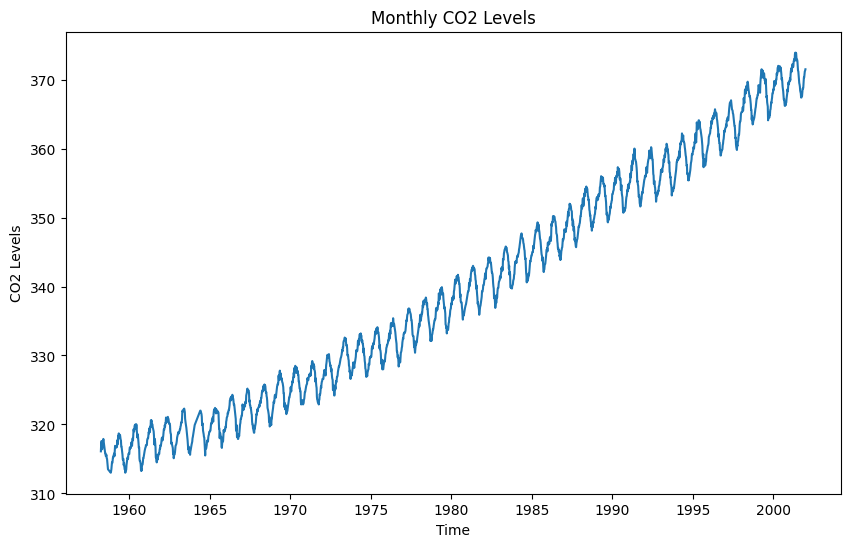

In [ ]:
# Visualize the time series data
plt.figure(figsize=(10, 6))
plt.plot(data)
plt.xlabel('Time')
plt.ylabel('CO2 Levels')
plt.title('Monthly CO2 Levels')
plt.show()


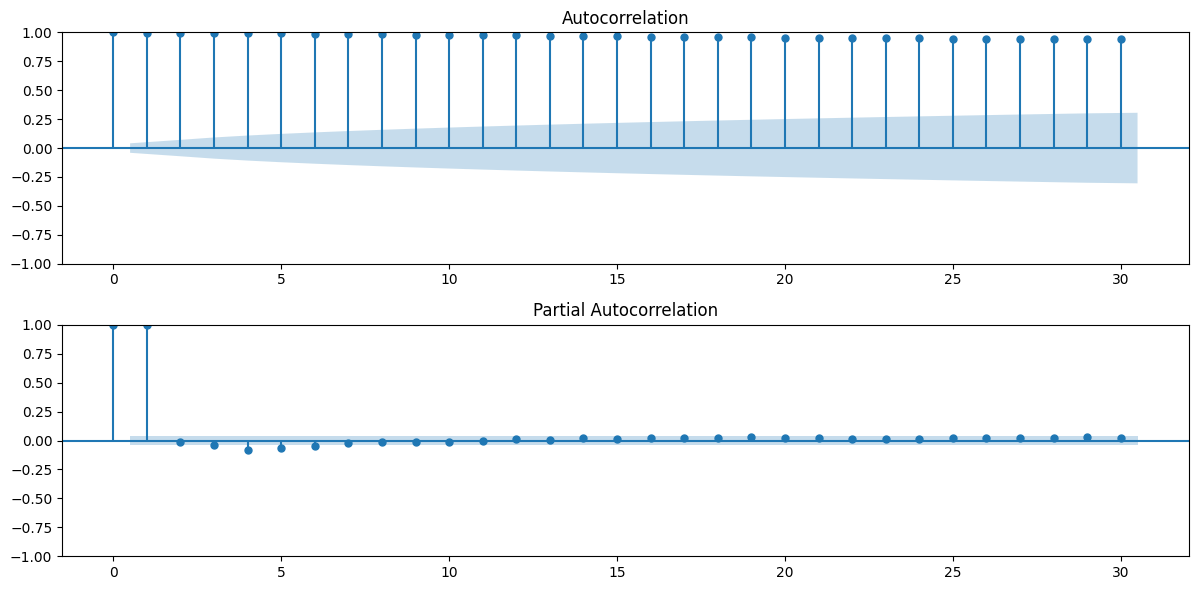

In [ ]:
# Step 3: Plot the Correlation and Auto Correlation Charts
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plot_acf(data, ax=plt.gca(), lags=30)
plt.title('Autocorrelation')

plt.subplot(2, 1, 2)
plot_pacf(data, ax=plt.gca(), lags=30)
plt.title('Partial Autocorrelation')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



Step 4: ARIMA Model Summary
                               SARIMAX Results                                
Dep. Variable:                    co2   No. Observations:                 2284
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1493.101
Date:                Mon, 11 Mar 2024   AIC                           2992.202
Time:                        09:44:47   BIC                           3009.402
Sample:                    03-29-1958   HQIC                          2998.476
                         - 12-29-2001                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8966      0.021     42.359      0.000       0.855       0.938
ma.L1         -0.7549      0.032    -23.300      0.000      -0.818      -0.691
sigma2         0.2165  

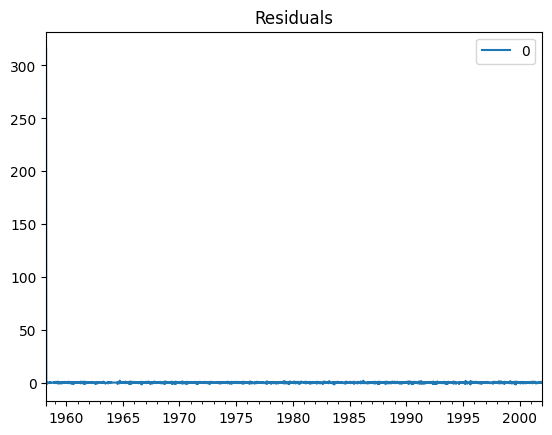

In [ ]:
# Step 4: Construct the ARIMA Model
# Fit ARIMA model
model = ARIMA(data, order=(1, 1, 1))
model_fit = model.fit()

# Print model summary
print("\nStep 4: ARIMA Model Summary")
print(model_fit.summary())

# Plot residuals to ensure they are white noise
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.title('Residuals')
plt.show()


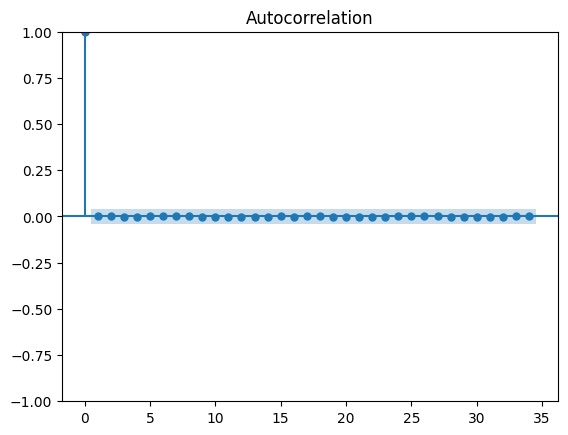

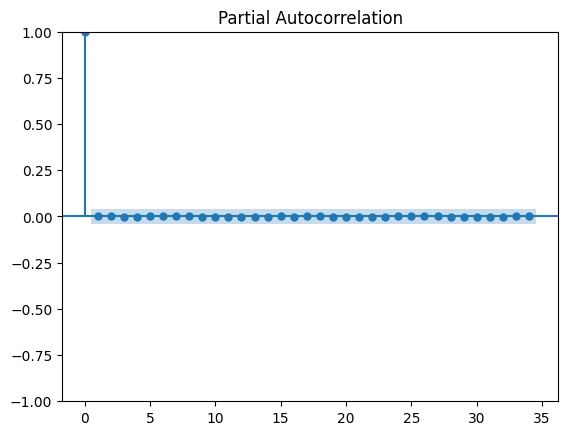

In [ ]:
# Plot ACF and PACF of residuals to ensure no autocorrelation
plot_acf(residuals)
plot_pacf(residuals)
plt.show()
